In [13]:
import openai
import os

from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

openai.api_key = os.getenv("OPENAI_API_KEY")
# print(openai.api_key )

client = openai.OpenAI()

# model="gpt-3.5-turbo"
# model="gpt-4o-mini"


def get_completion(prompt, model="gpt-4o-mini"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model, messages=messages, temperature=0
    )
    return response.choices[0].message.content

In [ ]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 10 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

     Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
495   20230   IT-2013-GM1444091-41347 2013-03-14 2013-03-17     First Class   
496   43099     CA-2015-AB10523-42139 2015-05-15 2015-05-15        Same Day   
497    2375   MX-2015-JB1540051-42263 2015-09-16 2015-09-18     First Class   
498   22855   IN-2015-JS1603097-42223 2015-08-07 2015-08-12  Standard Class   
499   28076  IN-2014-AM10705102-41891 2014-09-09 2014-09-09        Same Day   

     Customer ID     Customer Name    Segment  Postal Code            City  \
495   GM-1444091       Gary McGarr   Consumer          NaN       Eindhoven   
496     AB-10523     Adrian Barton   Consumer          NaN         Toronto   
497   JB-1540051  Jennifer Braxton  Corporate          NaN  Quetzaltenango   
498   JS-1603097         Joy Smith   Consumer          NaN          Lahore   
499  AM-10705102    Anne McFarland   Consumer          NaN          Manila   

     ...   Product ID         Category Sub-Category  \
4

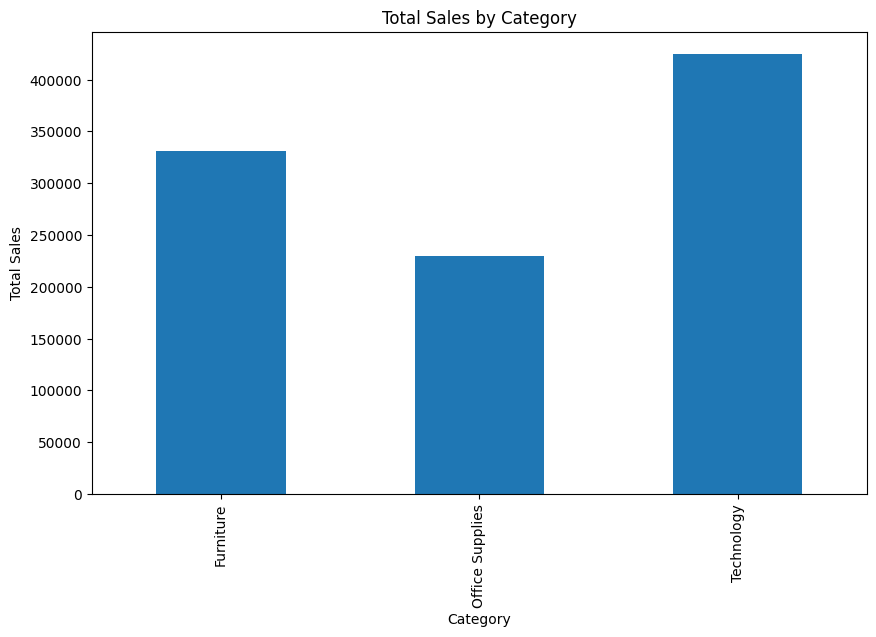

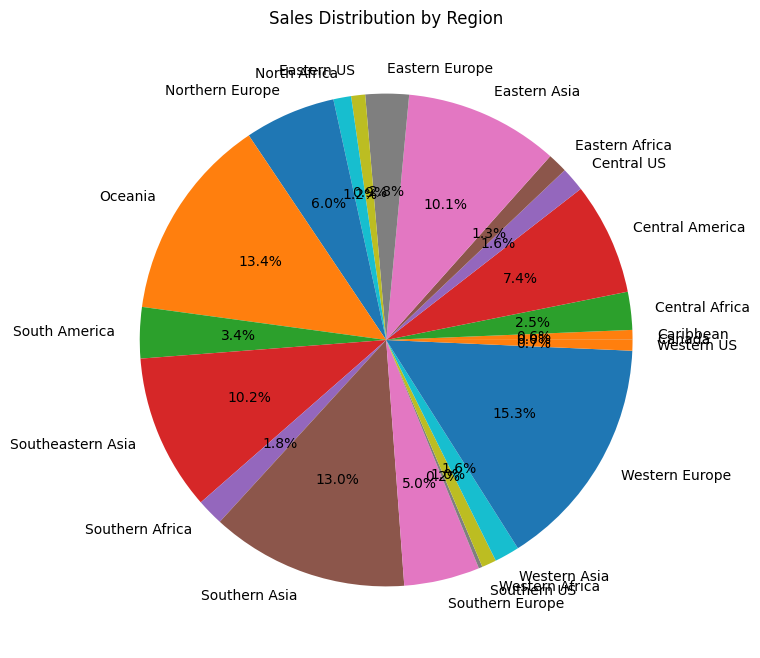

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_42106/1146311874.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Sales'].sum().plot(kind='line')


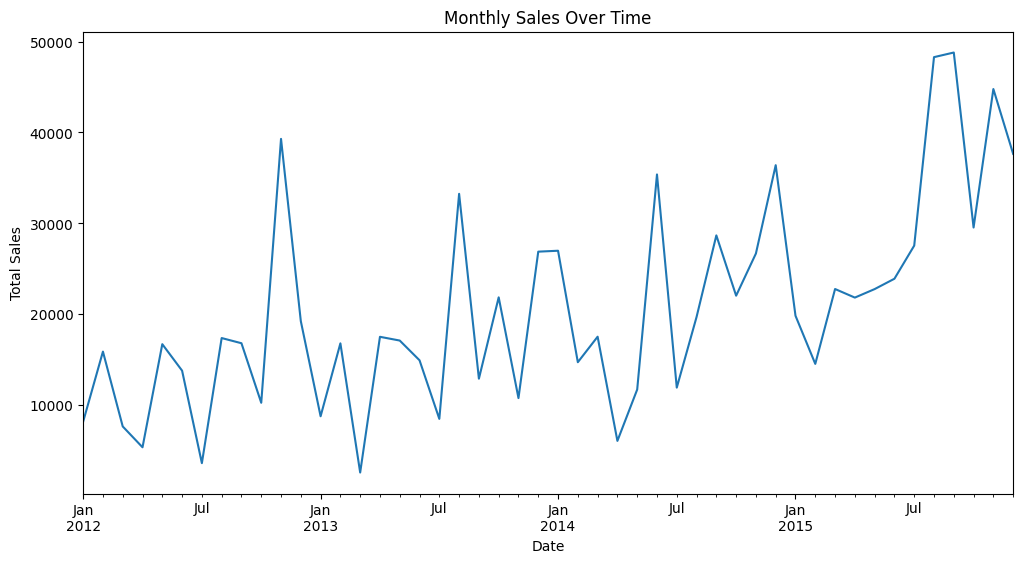

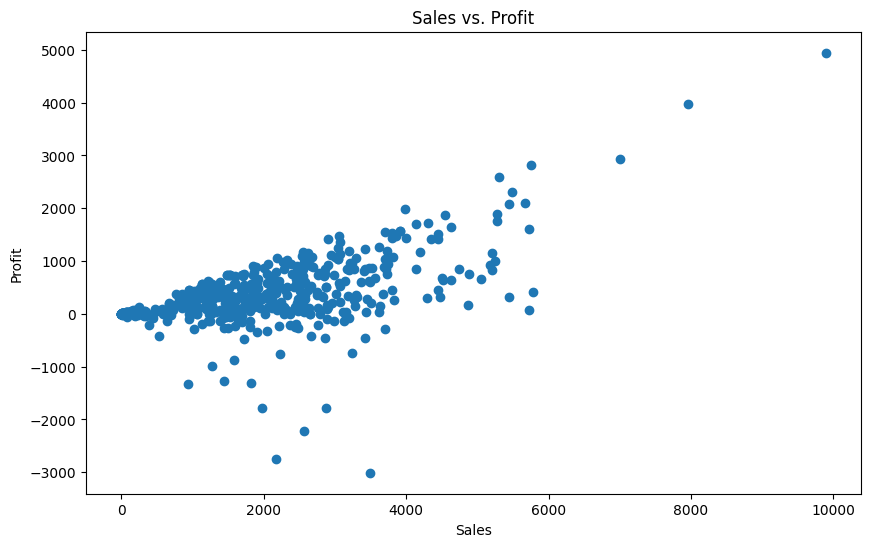

<Figure size 1000x600 with 0 Axes>

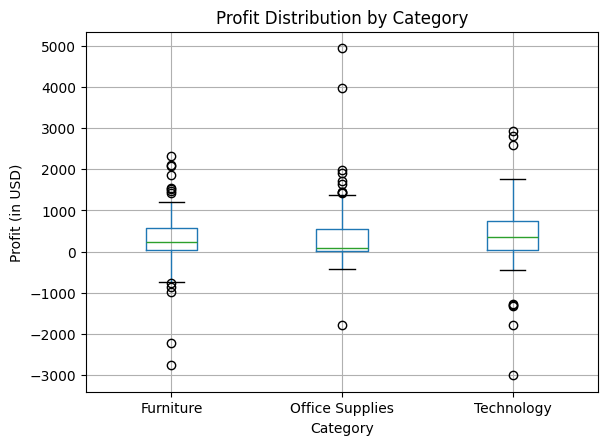

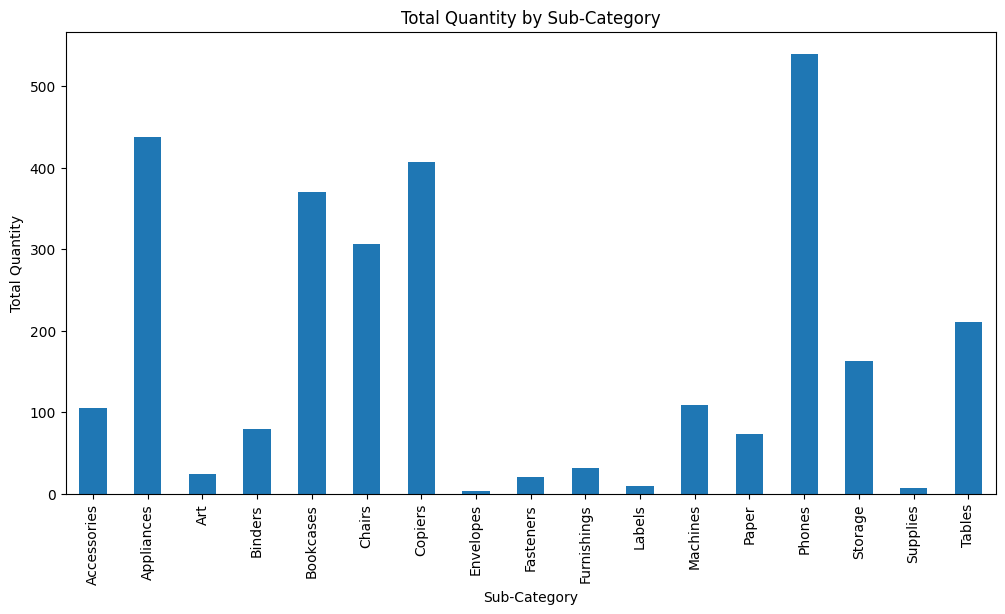

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_42106/1146311874.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Profit'].sum().plot(kind='line')


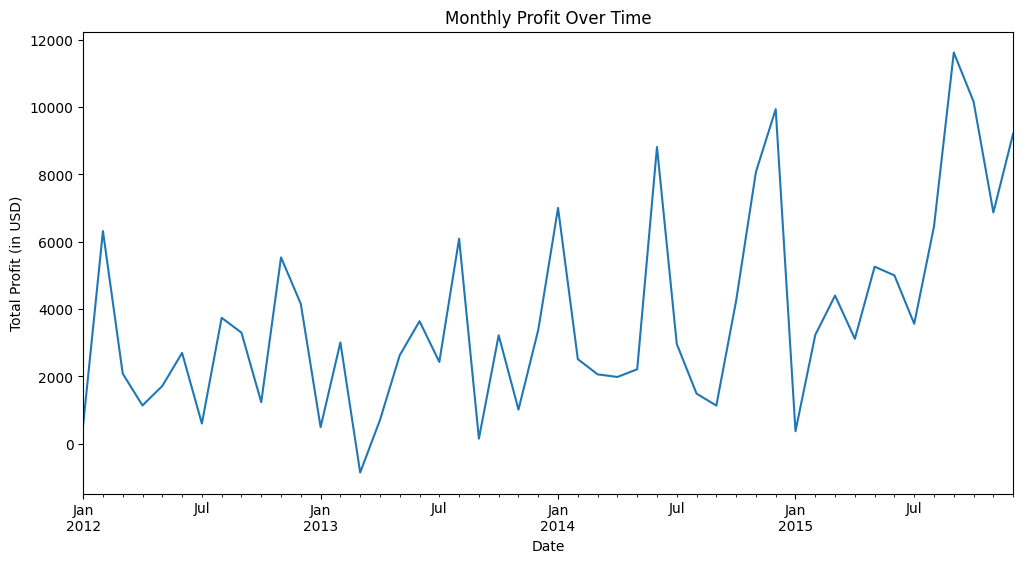

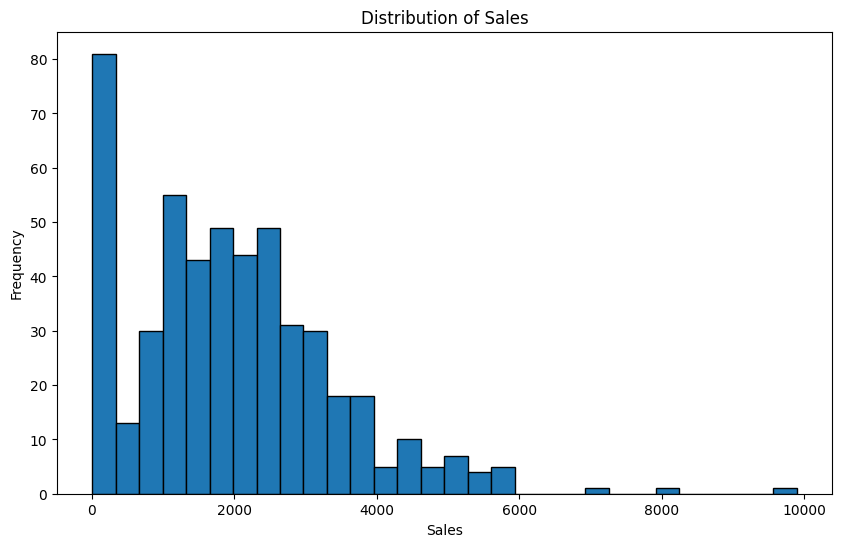

In [11]:
# Can you load this xls in this file path in a Pandas df. And could you draw matplotlob plots as many as you can to visualize the data. You can only use the fields which makse sense to draw the plots. And Can you add Labels to the plots and update the code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/mahtabsyed/Library/Mobile Documents/com~apple~CloudDocs/All Family Storage/1 - Career - Mahtab/UST/Data and AI/AI Presentation/Data/Smaller Global Superstore Orders 2016.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.tail())

# Plotting various visualizations using matplotlib
# Example 1: Bar plot of Sales by Category
plt.figure(figsize=(10, 6))
df.groupby("Category")["Sales"].sum().plot(kind="bar")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Example 2: Pie chart of Sales by Region
plt.figure(figsize=(8, 8))
df.groupby("Region")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

# Example 3: Line plot of Sales over Time
plt.figure(figsize=(12, 6))
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.set_index("Order Date").resample("M")["Sales"].sum().plot(kind="line")
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Example 4: Scatter plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(df["Sales"], df["Profit"])
plt.title("Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

# Example 5: Box plot of Profit by Category
plt.figure(figsize=(10, 6))
df.boxplot(column="Profit", by="Category")
plt.title("Profit Distribution by Category")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Category")
plt.ylabel("Profit (in USD)")
plt.show()

# Example 6: Bar plot of Quantity by Sub-Category
plt.figure(figsize=(12, 6))
df.groupby("Sub-Category")["Quantity"].sum().plot(kind="bar")
plt.title("Total Quantity by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Quantity")
plt.show()

# Example 7: Line plot of Profit over Time
plt.figure(figsize=(12, 6))
df.set_index("Order Date").resample("M")["Profit"].sum().plot(kind="line")
plt.title("Monthly Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Total Profit (in USD)")
plt.show()

# Example 8: Histogram of Sales
plt.figure(figsize=(10, 6))
df["Sales"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Can you load this xls in this file path in a Pandas df. And take just 5 rows from top and send to openai LLM to get insights. Just summarize the key insighst on the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/mahtabsyed/Library/Mobile Documents/com~apple~CloudDocs/All Family Storage/1 - Career - Mahtab/UST/Clients/JPMorgan/Data/Still Smaller Global Superstore Orders 2016.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Take the first 6 rows of the dataframe
df_sample = df.head(5)

# Convert the sample dataframe to a string format
data_str = df_sample.to_string(index=False)

# Define the prompt for OpenAI LLM
prompt = f"""
Your task is to generate insights from the following data.

Data: ```{data_str}```
"""

# Get the response from OpenAI LLM
response = get_completion(prompt)
print(response)

Based on the provided data, here are some insights:

### Sales Performance
1. **Top Selling Product**: The product with the highest sales is the **Novimex Executive Leather Armchair, Black**, generating **$3709.395** in sales, despite a significant loss in profit (-$288.7650). This indicates that while the product is popular, it may not be priced effectively or has high associated costs.

2. **Profitability**: The **Nokia Smart Phone, with Caller ID** has a high sales figure of **$5175.171** and a profit of **$919.9710**, indicating it is a profitable product. In contrast, the **Samsung Convoy 3** has lower sales but a decent profit margin, suggesting it is a stable product for the company.

3. **Discount Impact**: The **Novimex Executive Leather Armchair** had a discount of **10%**, which may have contributed to its high sales volume but also resulted in a loss. In contrast, the **Samsung Convoy 3** had no discount, indicating that maintaining price integrity can lead to profitability